# [cv2] imwrite

### 概要
- cv2の基本メソッド、imwriteについてまとめる

### 使い方
- 画像、保存形式、オプション（圧縮率やクオリティについて）を指定する

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import japanize_matplotlib

In [2]:
# まずは画像を読み込む
img = cv2.imread('src/lena.png')
img.dtype, img.shape

(dtype('uint8'), (512, 512, 3))

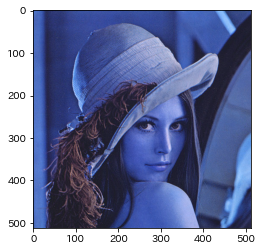

In [3]:
plt.imshow(img)

なぜ画像が青っぽく見えるかというと
- cv2のimreadはBGRの順
- pltのimshowはRGBの順

となっているから順番を反転させてあげれば以下のように綺麗に表示できる

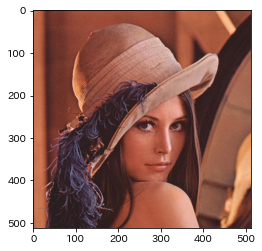

In [4]:
plt.imshow(img[:, :, ::-1])

# cv2.imwrite
- `imwrite(path, img, option)`で保存可能
- 形式はjpeg, png, webp, jp2, tiffなど様々な形式で保存可能
- それぞれ、劣化が存在するので機械学習などで使用する際はLossless保存かどうか注意する
- jpegによる劣化は後述

In [5]:
cv2.imwrite('src/lena_images/lena.jpg', img)

True

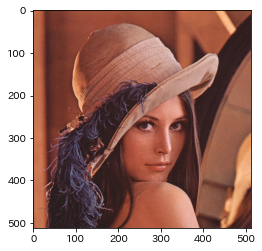

In [6]:
# まずは通常の保存
saved_img = cv2.imread('src/lena_images/lena.jpg')
plt.imshow(saved_img[:, :, ::-1])

max: 64.0, min: 0.0, ave: 2.3


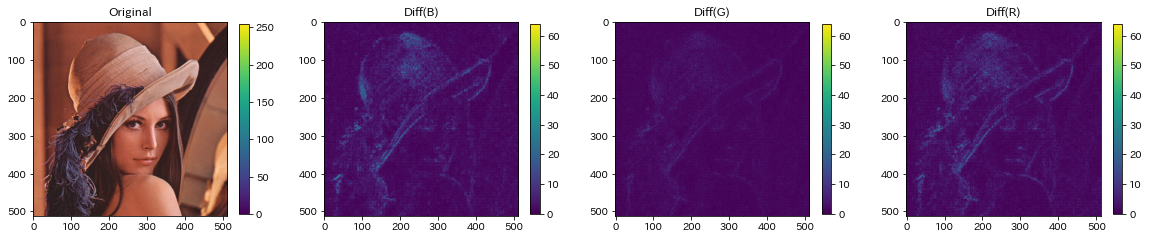

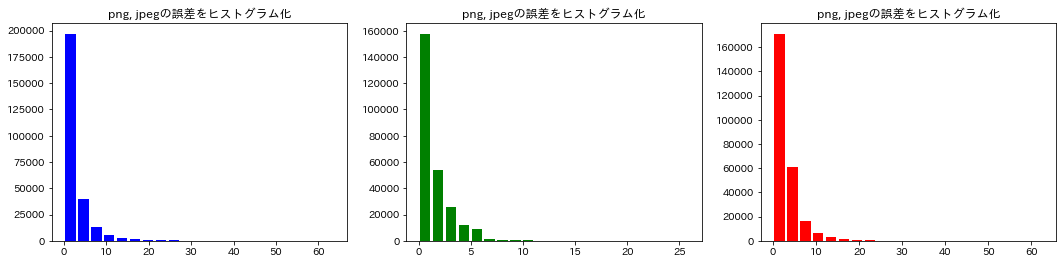

In [7]:
# この場合だと、劣化が発生している
# 誤差を絶対値として出力する
diff_img = np.abs(img.astype(np.float32)-saved_img.astype(np.float32))
diff_hists = diff_img.reshape(-1, 3).transpose(1, 0)
print('max: {:.1f}, min: {:.1f}, ave: {:.1f}'.format(diff_img.max(),diff_img.min(),diff_img.mean()))
colors=['b', 'g', 'r']

plt.figure(figsize=[20, 5])
plt.subplot(1, 4, 1), plt.imshow(img[:, :, ::-1]), plt.colorbar(shrink=0.7), plt.title('Original')
plt.subplot(1, 4, 2), plt.imshow(diff_img[:, :, 0], vmin=0, vmax=diff_img.max()), plt.colorbar(shrink=0.7), plt.title('Diff(B)')
plt.subplot(1, 4, 3), plt.imshow(diff_img[:, :, 1], vmin=0, vmax=diff_img.max()), plt.colorbar(shrink=0.7), plt.title('Diff(G)')
plt.subplot(1, 4, 4), plt.imshow(diff_img[:, :, 2], vmin=0, vmax=diff_img.max()), plt.colorbar(shrink=0.7), plt.title('Diff(R)')
plt.show()

plt.figure(figsize=[18, 4])
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title('png, jpegの誤差をヒストグラム化')
    plt.hist(diff_hists[i], bins=21, rwidth=0.8, color=colors[i])
plt.show()

In [8]:
# jp2画像として保存(lossless)
jp2_path = 'src/lena_images/lena_jp2_lossless.jp2'
cv2.imwrite(jp2_path, img, [cv2.IMWRITE_JPEG2000_COMPRESSION_X1000, 1000])

True

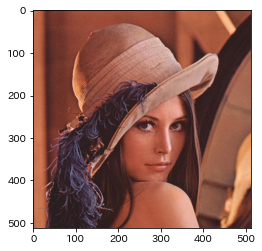

In [9]:
saved_img = cv2.imread(jp2_path)
plt.imshow(saved_img[:, :, ::-1])

max: 0.0, min: 0.0, ave: 0.0


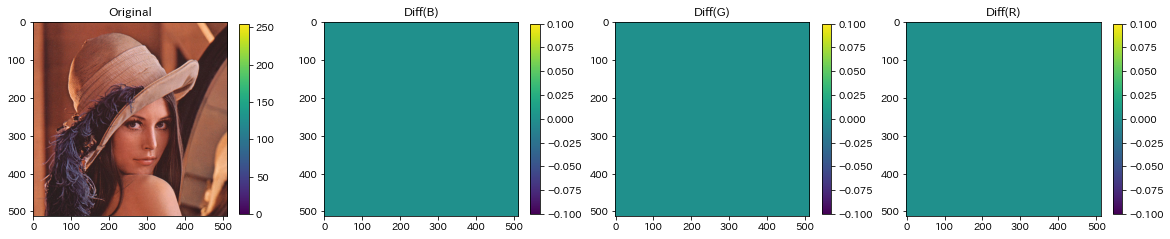

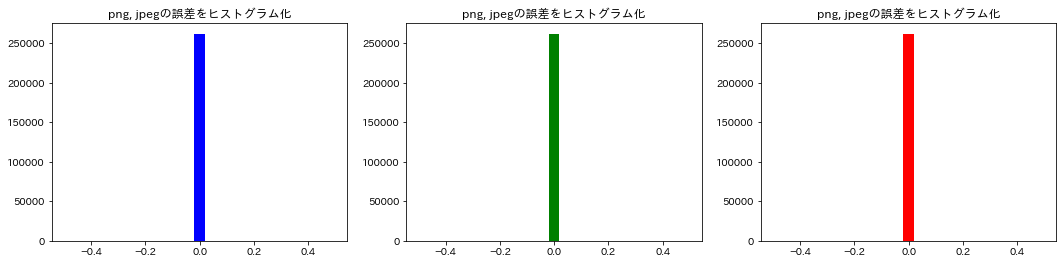

In [15]:
# 誤差を絶対値として出力する
diff_img = np.abs(img.astype(np.float32)-saved_img.astype(np.float32))
diff_hists = diff_img.reshape(-1, 3).transpose(1, 0)
print('max: {:.1f}, min: {:.1f}, ave: {:.1f}'.format(diff_img.max(),diff_img.min(),diff_img.mean()))
colors=['b', 'g', 'r']

plt.figure(figsize=[20, 5])
plt.subplot(1, 4, 1), plt.imshow(img[:, :, ::-1]), plt.colorbar(shrink=0.7), plt.title('Original')
plt.subplot(1, 4, 2), plt.imshow(diff_img[:, :, 0], vmin=0, vmax=diff_img.max()), plt.colorbar(shrink=0.7), plt.title('Diff(B)')
plt.subplot(1, 4, 3), plt.imshow(diff_img[:, :, 1], vmin=0, vmax=diff_img.max()), plt.colorbar(shrink=0.7), plt.title('Diff(G)')
plt.subplot(1, 4, 4), plt.imshow(diff_img[:, :, 2], vmin=0, vmax=diff_img.max()), plt.colorbar(shrink=0.7), plt.title('Diff(R)')
plt.show()

plt.figure(figsize=[18, 4])
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title('png, jpegの誤差をヒストグラム化')
    plt.hist(diff_hists[i], bins=21, rwidth=0.8, color=colors[i])
plt.show()

- jpeg2000での保存の場合、劣化が発生していないことがわかった
- 容量の比較はどうか

In [16]:
import os, glob

In [17]:
paths = glob.glob('src/lena_images/*')
paths

['src/lena_images/lena_png_comp_05.png',
 'src/lena_images/lena.jpg',
 'src/lena_images/lena_png_comp_10.png',
 'src/lena_images/lena_png_comp_00.png',
 'src/lena_images/lena_png_comp_02.png',
 'src/lena_images/lena_jp2_lossless.jp2',
 'src/lena_images/lena_jpeg_100.jpg']

In [18]:
for path in paths:
    print('{:.1f} kb - {}'.format(os.path.getsize(path)/1000, path))

473.2 kb - src/lena_images/lena_png_comp_05.png
112.0 kb - src/lena_images/lena.jpg
467.4 kb - src/lena_images/lena_png_comp_10.png
788.3 kb - src/lena_images/lena_png_comp_00.png
491.3 kb - src/lena_images/lena_png_comp_02.png
449.0 kb - src/lena_images/lena_jp2_lossless.jp2
224.1 kb - src/lena_images/lena_jpeg_100.jpg


- pngの圧縮率について比較してみる

In [19]:
# jp2画像として保存(lossless)
for comp in [0, 2, 5, 10 ]:
    png_path = 'src/lena_images/lena_png_comp_{}.png'.format(str(comp).zfill(2))
    cv2.imwrite(png_path, img, [cv2.IMWRITE_PNG_COMPRESSION, comp])

In [20]:
orig_size = os.path.getsize('src/lena.png')
print('{:.1f} kb - {}'.format(orig_size/1000, 'src/lena.png'))

paths = glob.glob('src/lena_images/*.png')
paths = sorted(paths)
for path in paths:
    print('{:.1f} kb - {}'.format(os.path.getsize(path)/1000, path))

620.6 kb - src/lena.png
788.3 kb - src/lena_images/lena_png_comp_00.png
491.3 kb - src/lena_images/lena_png_comp_02.png
473.2 kb - src/lena_images/lena_png_comp_05.png
467.4 kb - src/lena_images/lena_png_comp_10.png


- 無圧縮だとjpegのおよそ3枚程度の容量
- 圧縮率を最大にした場合、jpegのおよそ2枚程度の容量
- 圧縮画像に依存するため、別の画像の場合は異なる数値となる可能性大